In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from background_plotter import background_estimate_plotter
from background_calc import background_estimate
from background_config import Background_Config

In [16]:
rawdata_path = 'data/level0.csv'

ch4_class = Background_Config(rawdata_colname="CH4")
ch4_dset_info = ch4_class.__dict__

c2h6_class = Background_Config(rawdata_colname="C2H6")
c2h6_class.polynomial_degree = 4
c2h6_dset_info = c2h6_class.__dict__

In [17]:
df0 = pd.read_csv(rawdata_path, parse_dates=['Timestamp'])
aeris_mask = (df0['CH4'].notna() & df0['C2H6'].notna()) & (df0['Sts'] > 0)

In [18]:
seconds = np.array(df0.loc[aeris_mask,'Seconds'])
rawdata = np.array(df0.loc[aeris_mask, ch4_dset_info['rawdata_colname']])
df_ch4 = background_estimate(seconds, rawdata, ch4_dset_info)
df_ch4.index = df0.loc[aeris_mask,:].index
df_ch4.loc[aeris_mask,'Timestamp'] = df0.loc[aeris_mask,'Timestamp']

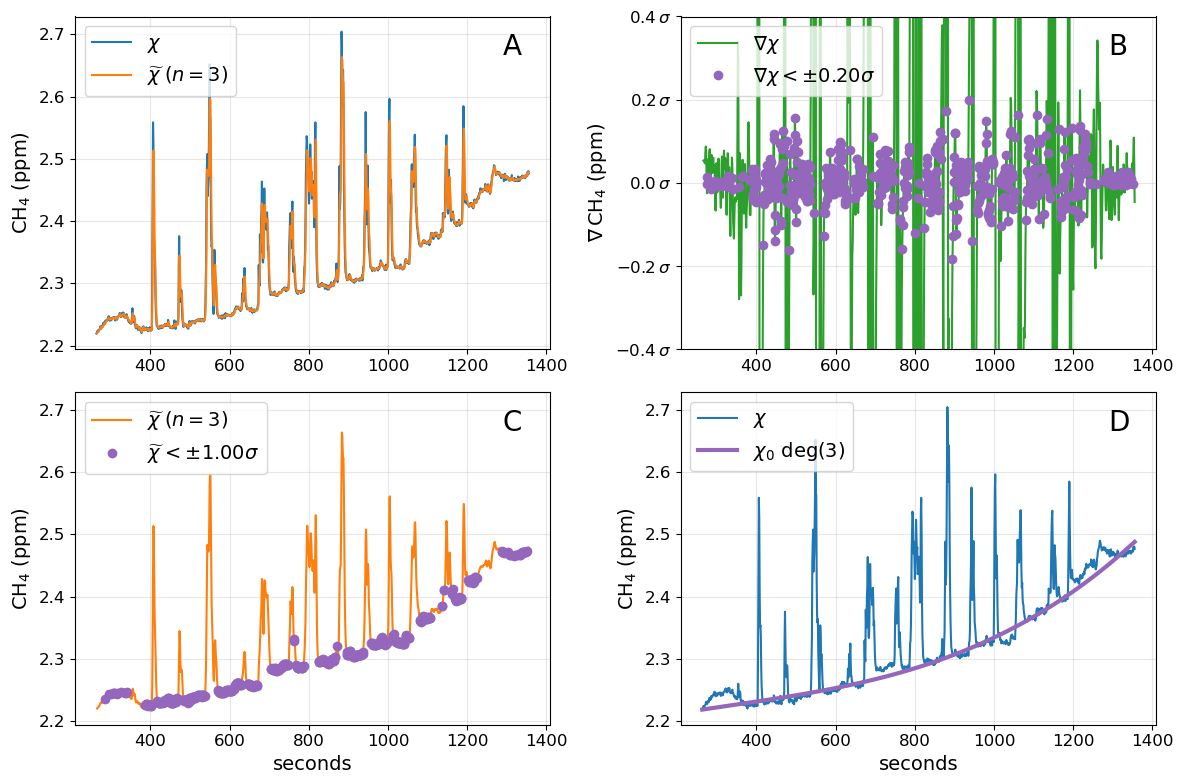

In [19]:
fig=background_estimate_plotter(df_ch4, ch4_dset_info)

In [20]:
seconds = np.array(df0.loc[aeris_mask,'Seconds'])
rawdata = np.array(df0.loc[aeris_mask, c2h6_dset_info['rawdata_colname']])
df_c2h6 = background_estimate(seconds, rawdata, c2h6_dset_info)
df_c2h6.index = df0.loc[aeris_mask,:].index
df_c2h6.loc[aeris_mask,'Timestamp'] = df0.loc[aeris_mask,'Timestamp']

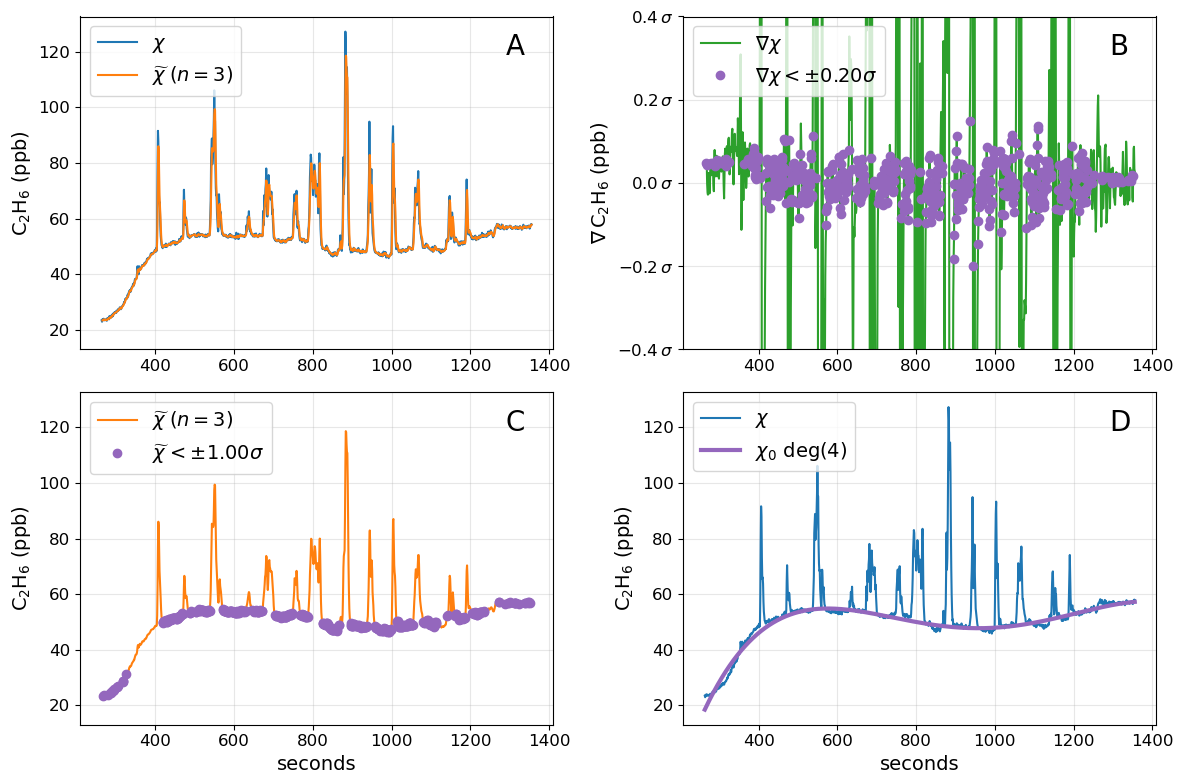

In [21]:
fig=background_estimate_plotter(df_c2h6, c2h6_dset_info)

In [22]:
df_ch4

,seconds,CH4,smoothed_data,segment_data,segment_label,segment_gradient,gradient_mask,outlier_mask,CH4_background,CH4_background_error,CH4_adjusted,Timestamp
1317,263.393973,2.21974,NaN,NaN,0,NaN,False,False,2.218695,NaN,0.001045,2023-04-19 07:14:29.063674-07:00
1322,264.394250,2.22097,NaN,NaN,0,NaN,False,False,2.218791,NaN,0.002179,2023-04-19 07:14:30.063951-07:00
1327,265.394909,2.22025,2.220320,2.220320,0,NaN,False,False,2.218886,NaN,0.001364,2023-04-19 07:14:31.064610-07:00
1332,266.394282,2.22436,2.221860,2.221860,0,0.001042,False,False,2.218982,NaN,0.005378,2023-04-19 07:14:32.063983-07:00
1342,268.394346,2.22260,2.222403,2.222403,0,0.000973,False,False,2.219173,NaN,0.003427,2023-04-19 07:14:34.064047-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1351.394120,2.47234,2.473247,2.473247,8,0.000767,False,False,2.485650,NaN,-0.013310,2023-04-19 07:32:37.063821-07:00
6762,1352.394753,2.47931,2.474923,2.474923,8,0.001597,False,False,2.486230,NaN,-0.006920,2023-04-19 07:32:38.064454-07:00
6767,1353.397772,2.47767,2.476440,2.476440,8,0.002108,False,False,2.486813,NaN,-0.009143,2023-04-19 07:32:39.067473-07:00
6772,1354.394954,2.48044,2.479140,2.479140,8,0.000903,False,False,2.487393,NaN,-0.006953,2023-04-19 07:32:40.064655-07:00


In [23]:
df_c2h6

,seconds,C2H6,smoothed_data,segment_data,segment_label,segment_gradient,gradient_mask,outlier_mask,C2H6_background,C2H6_background_error,C2H6_adjusted,Timestamp
1317,263.393973,23.3978,NaN,NaN,0,NaN,False,False,18.410664,NaN,4.987136,2023-04-19 07:14:29.063674-07:00
1322,264.394250,22.8642,NaN,NaN,0,NaN,False,False,18.709366,NaN,4.154834,2023-04-19 07:14:30.063951-07:00
1327,265.394909,23.7572,23.339733,23.339733,0,NaN,False,False,19.006528,NaN,4.750672,2023-04-19 07:14:31.064610-07:00
1332,266.394282,23.3974,23.339600,23.339600,0,0.179533,True,True,19.301663,4.095737,4.095737,2023-04-19 07:14:32.063983-07:00
1342,268.394346,23.9418,23.698800,23.698800,0,0.168150,True,True,19.887406,4.054394,4.054394,2023-04-19 07:14:34.064047-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6757,1351.394120,57.1700,56.925767,56.925767,8,0.064083,True,True,57.148443,0.021557,0.021557,2023-04-19 07:32:37.063821-07:00
6762,1352.394753,57.5521,57.036133,57.036133,8,0.314017,False,False,57.161765,NaN,0.390335,2023-04-19 07:32:38.064454-07:00
6767,1353.397772,57.9393,57.553800,57.553800,8,0.332883,False,False,57.174791,NaN,0.764509,2023-04-19 07:32:39.067473-07:00
6772,1354.394954,57.6143,57.701900,57.701900,8,0.126950,False,False,57.187413,NaN,0.426887,2023-04-19 07:32:40.064655-07:00
